**Machine Learning - Project Report, Air B&B**
The assignment involves conducting a business analysis for Airbnb using the 2019 NYC dataset from Kaggle. The dataset includes detailed information about hosts, geographic availability, and various metrics necessary for making predictions and drawing conclusions. The goal is to assess the ability to pose meaningful business questions, process the data through key steps of big data analytics (such as data pre-processing, exploratory data analysis, statistical analysis, data visualization, and using unsupervised machine learning algorithms), and prepare a concise analytical report for Airbnb's executive board.

**Business Question =  How do various factors (e.g., price, number of reviews, location, property type) influence the likelihood of a listing being booked?**

In [ ]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read the csv from GitHub into the variable df
path = "https://cfinal15.github.io/Machine%20Learning/AB_NYC_2019.csv"
df = pd.read_csv(path)

#Viewing Dating
print("Figure 1 - Describing the initial data")
print("Number of columns in data: ", len(df.columns))
print("Number of entries in data: ", len(df))
df.head()


Figure 1 - Describing the initial data
Number of columns in data:  16
Number of entries in data:  48895


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Describing the variables and statistical outputs
print("Figure 2 - Summarising data")
print(df.describe())

Figure 2 - Summarising data
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min     

In [ ]:
#Describing the character types of the variables
df.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.isnull().sum() #lets check the null values in each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Lets remove the null data in name, last review. Replace reviews per month with 0 if null
df = df[pd.notnull(df['name'])]
df = df[pd.notnull(df['last_review'])]
df = df[pd.notnull(df['host_name'])]
df.fillna({'reviews_per_month':0}, inplace=True)
#Figure 3 - Replacing Null values
print("Figure 3 - Replacing Null values")
df.isnull().sum()

Figure 3 - Replacing Null values


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#bookings per room type : Entire homes/apt has the most number of bookings
room_types = df.room_type.value_counts()
room_types

#create function to be called later
def plot_room_types(ax, room_types):
    sns.barplot(x=room_types.index, y=room_types.values, ax=ax)
    ax.set_title('Figure 4 - Count of Room Types')
    ax.set_xlabel('Room Type')
    ax.set_ylabel('Count')


In [ ]:
#which neighbourhood has the most hosts
NB_Count=df.groupby(by=['neighbourhood']).neighbourhood.count()
NB_Count = NB_Count.sort_values(ascending=False)
print(NB_Count) #Williamsburg with the most

# Select top 10 neighborhoods
top_10_NB_Count = NB_Count.head(10)

#create function to be called later
def plot_neighbourhood_counts(ax, NB_Count):
    sns.barplot(x=NB_Count.index, y=NB_Count.values, ax=ax)
    ax.set_title('Figure 5 - Count of Listings by Neighbourhood Top 10')
    ax.set_xlabel('Neighbourhood')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Castle Hill              2
West Farms               2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64


In [ ]:
#Which neighbourhood_group is the biggest one?
NB_Group_Count=df.groupby(by=['neighbourhood_group']).neighbourhood_group.count()
NB_Group_Count = NB_Group_Count.sort_values(ascending=False)
print(NB_Group_Count) #Manhattan contains the most

#create function to be called later
def plot_neighbourhood_group_counts(ax, NB_Group_Count):
    sns.barplot(x=NB_Group_Count.index, y=NB_Group_Count.values, ax=ax)
    ax.set_title('Figure 7 - Count of Listings by Neighbourhood Groups')
    ax.set_xlabel('Neighbourhood Group')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64


In [ ]:
#Which room_type have more reviews?
Room_Reviews=df.groupby(by=['room_type']).number_of_reviews.sum()
Room_Reviews = Room_Reviews.sort_values(ascending=False)
print(Room_Reviews)

#create function to be called later
def plot_room_reviews(ax, Room_Reviews):
    sns.barplot(x=Room_Reviews.index, y=Room_Reviews.values, ax=ax)
    ax.set_title('Figure 6 - Count of Room Reviews')
    ax.set_xlabel('Type of room')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

room_type
Entire home/apt    579856
Private room       537965
Shared room         19256
Name: number_of_reviews, dtype: int64


<ipython-input-66-2c92cef9aa49>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-68-2b1e73bcd9e0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-67-7c1f65ec8012>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


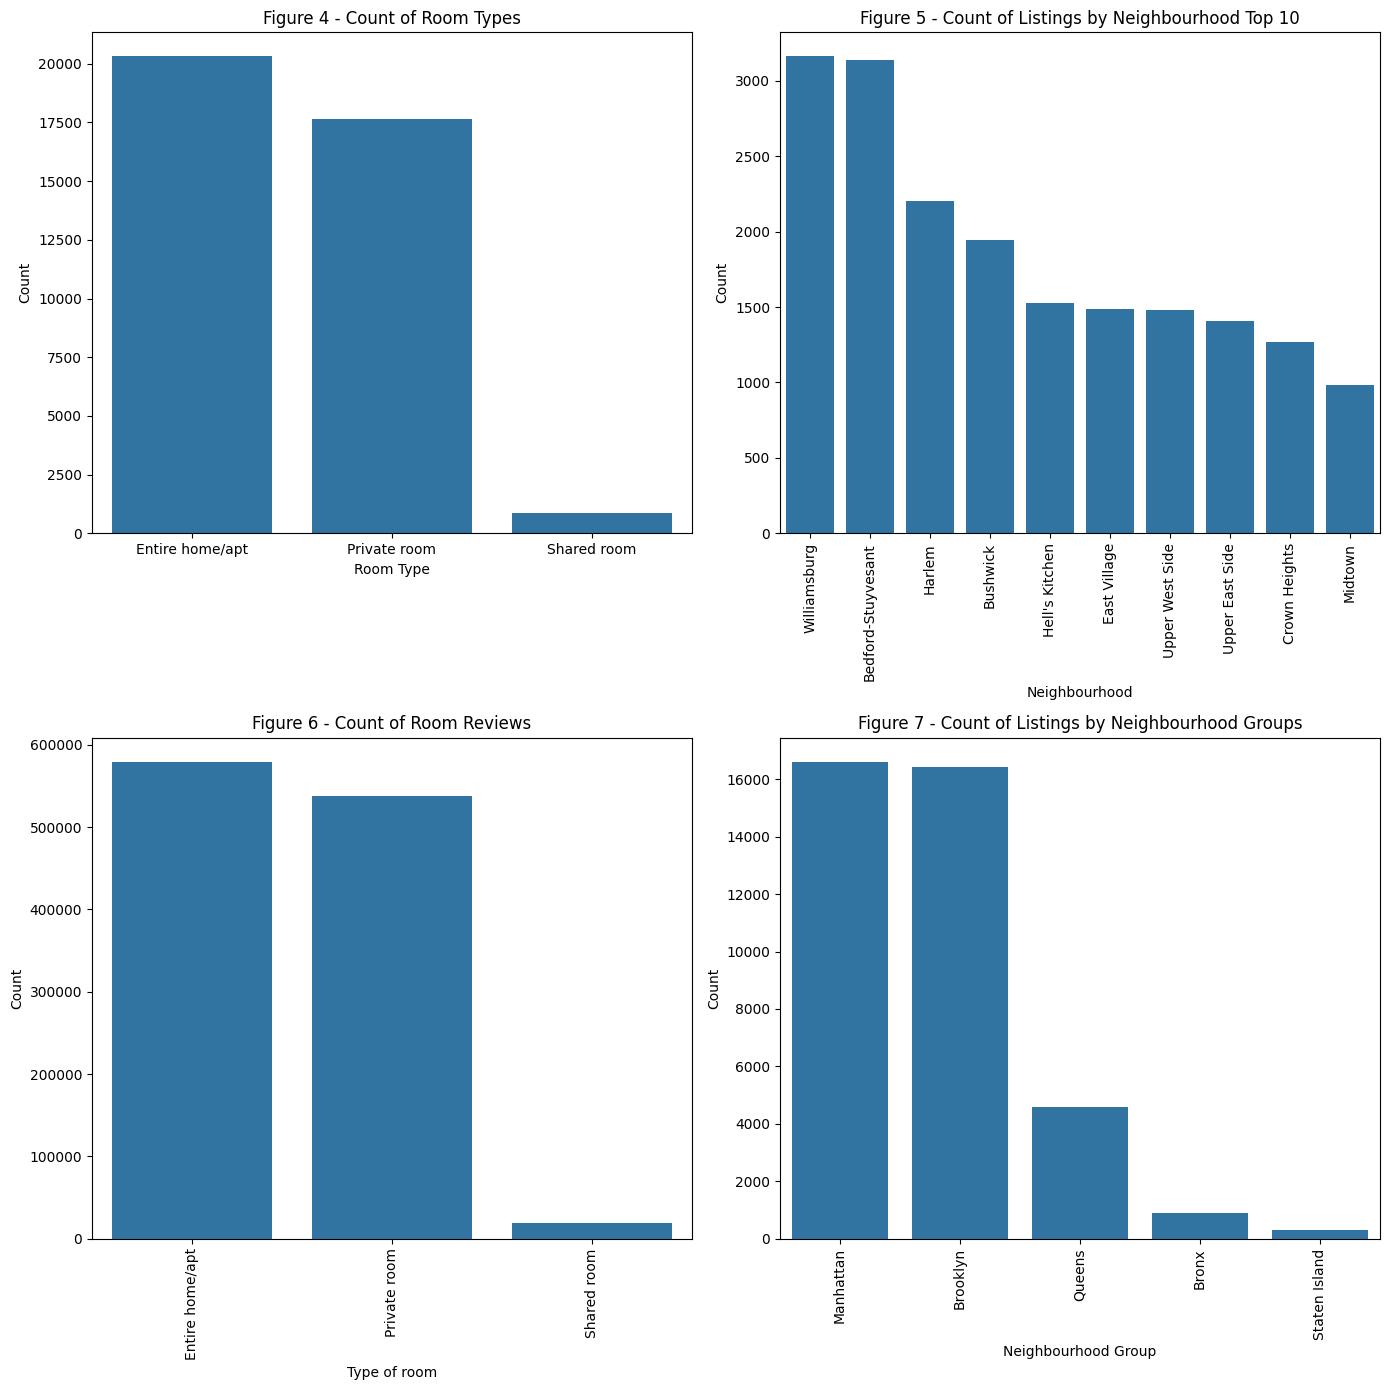

In [ ]:
# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Plot the graphs in the grid layout
plot_room_types(axes[0, 0], room_types)
plot_neighbourhood_counts(axes[0, 1], top_10_NB_Count)
plot_room_reviews(axes[1, 0], Room_Reviews)
plot_neighbourhood_group_counts(axes[1, 1], NB_Group_Count)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

neighbourhood_group
Manhattan        140.0
Brooklyn          94.0
Staten Island     75.0
Queens            72.0
Bronx             65.0
Name: price, dtype: float64
neighbourhood
Tribeca              287.5
Neponsit             274.0
Willowbrook          249.0
NoHo                 239.5
Flatiron District    223.0
                     ...  
Hunts Point           40.0
Bull's Head           39.0
New Dorp Beach        38.0
Concord               35.0
Van Nest              35.0
Name: price, Length: 218, dtype: float64


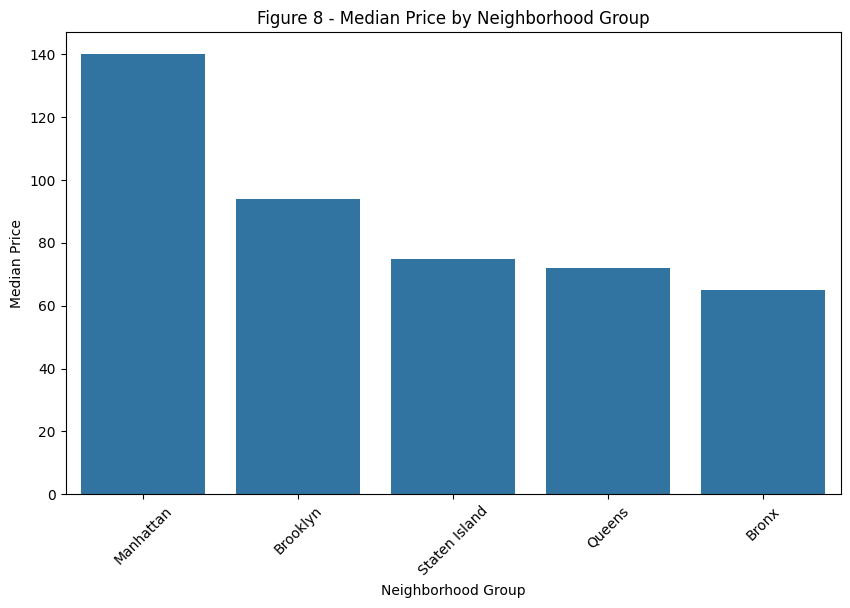

In [ ]:
#Which neighbourhood_group is the most expensive?
#using median over mean due price not being normally distributed
NB_Group_Price=df.groupby(by=['neighbourhood_group']).price.median()
NB_Group_Price = NB_Group_Price.sort_values(ascending=False)
print(NB_Group_Price) #Manhattan most expensive

#Which neighborhood has the most expensive?
NB_Price=df.groupby(by=['neighbourhood']).price.median()
NB_Price = NB_Price.sort_values(ascending=False)
print(NB_Price) #Tribecca most expensvie

#Plotting most median prices of neighbourhood groups
plt.figure(figsize=(10, 6))
sns.barplot(x=NB_Group_Price.index, y=NB_Group_Price.values)
plt.title('Figure 8 - Median Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Median Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Create 'booking_likelihood' feature -  This can be represented by the availability of the listing.
# Listings with lower availability are more likely to be frequently booked

df['booking_likelihood'] = 365 - df['availability_365']

# Display the first few rows to verify the new feature
df[['availability_365', 'booking_likelihood']].head()

,availability_365,booking_likelihood
0,365,0
1,355,10
3,194,171
4,0,365
5,129,236


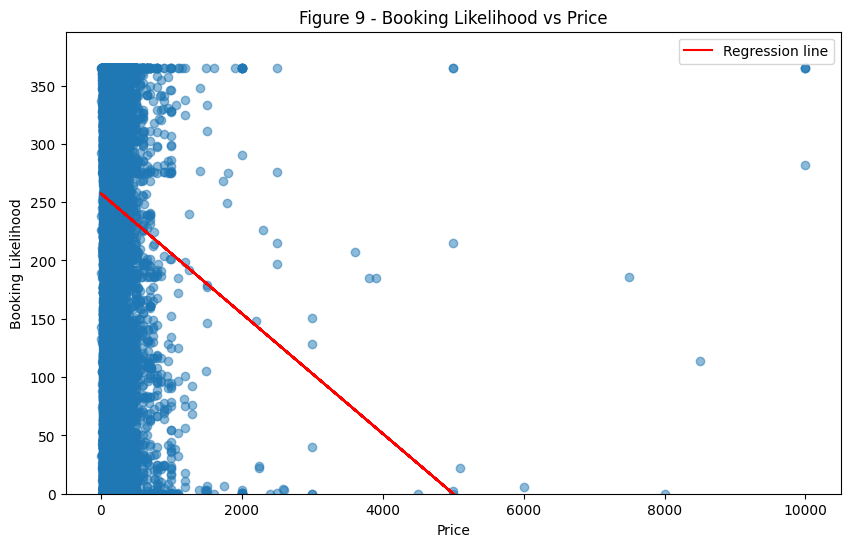

Regression Coefficient: -0.05146875932816532
Regression Intercept: 257.4393798832834


In [ ]:
#	Relationship between booking_likelihood and price.
from sklearn.linear_model import LinearRegression
X = df['price'].values.reshape(-1, 1)
y = df['booking_likelihood'].values
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['booking_likelihood'], alpha=0.5)
plt.plot(df['price'], y_pred, color='red', label='Regression line')
plt.title('Figure 9 - Booking Likelihood vs Price')
plt.xlabel('Price')
plt.ylabel('Booking Likelihood')
plt.legend()
plt.ylim(bottom=0)  # Ensure the y-axis only shows positive values
plt.show()

print(f"Regression Coefficient: {model.coef_[0]}")
print(f"Regression Intercept: {model.intercept_}")

The scatter plot shows a wide spread, indicating that price alone may not have a strong linear relationship with booking likelihood. However, there are clusters of listings with high prices and varying booking likelihoods.


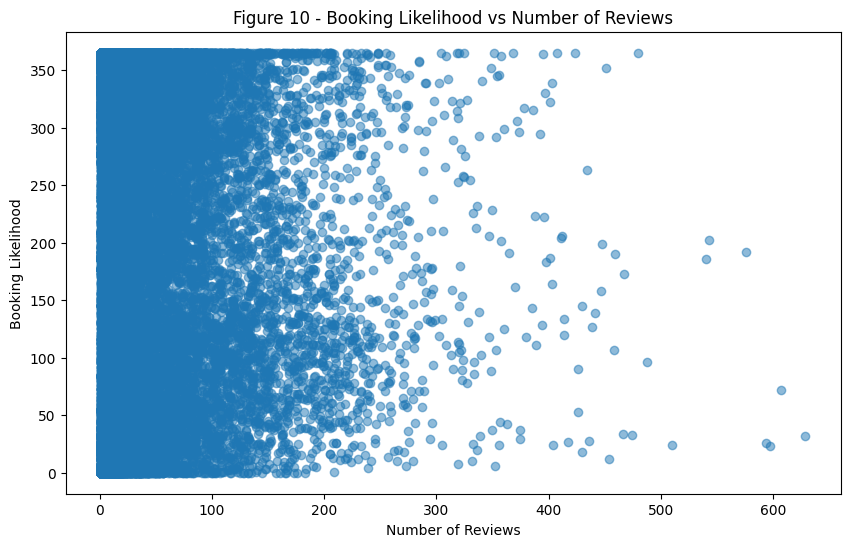

In [ ]:
# Scatter plot of 'booking_likelihood' vs 'number_of_reviews'

plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['booking_likelihood'], alpha=0.5)
plt.title('Figure 10 - Booking Likelihood vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Booking Likelihood')
plt.show()

<Figure size 1200x600 with 0 Axes>

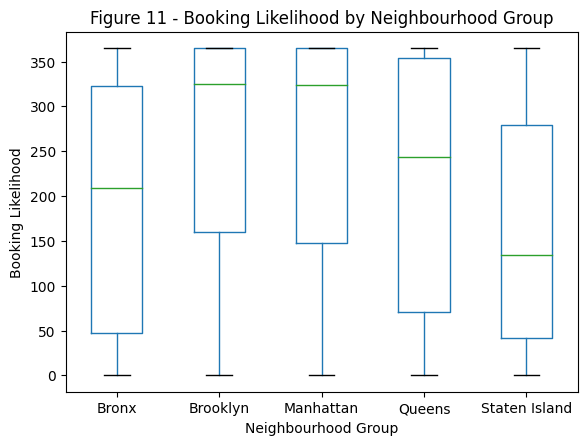

In [ ]:
# Box plot of 'booking_likelihood' by 'neighbourhood_group'
plt.figure(figsize=(12, 6))
df.boxplot(column='booking_likelihood', by='neighbourhood_group', grid=False)
plt.title('Figure 11 - Booking Likelihood by Neighbourhood Group')
plt.suptitle('')  # Suppress the default title to keep it clean
plt.xlabel('Neighbourhood Group')
plt.ylabel('Booking Likelihood')
plt.show()

<Figure size 1000x600 with 0 Axes>

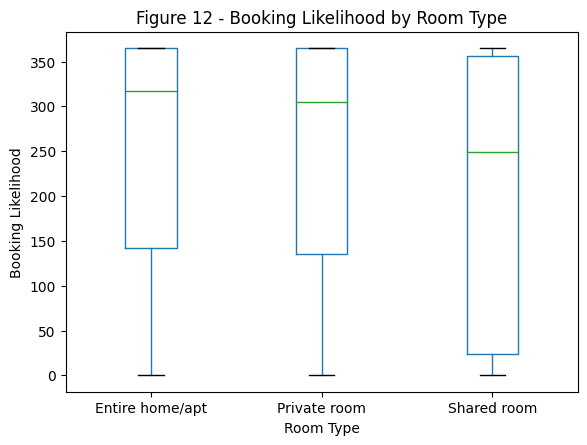

In [ ]:
# Box plot of 'booking_likelihood' by 'room_type'
plt.figure(figsize=(10, 6))
df.boxplot(column='booking_likelihood', by='room_type', grid=False)
plt.title('Figure 12 - Booking Likelihood by Room Type')
plt.suptitle('')  # Suppress the default title to keep it clean
plt.xlabel('Room Type')
plt.ylabel('Booking Likelihood')
plt.show()

	•	Price: There is no clear linear relationship between price and booking likelihood, but certain price ranges may attract more bookings.
	•	Number of Reviews: Listings with more reviews generally have higher booking likelihoods.
	•	Location (Neighbourhood Group): Different neighbourhood groups exhibit different booking patterns, indicating that location significantly impacts booking likelihood.
	•	Property Type (Room Type): Different room types show varying booking likelihoods, suggesting that the type of property influences bookings.

Text(0.5, 1.0, 'Figure 13 - Booking Likelihood Groups Across New York City')

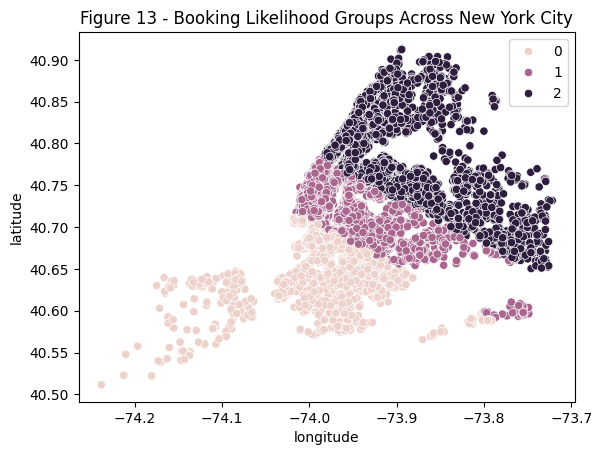

In [ ]:
# K-Means Clustering
# First, we set up training and test splits

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['longitude', 'latitude']], df[['booking_likelihood']], test_size=0.33, random_state=0)

# Normalize the training and test data

from sklearn import preprocessing

x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)

# Fitting and evaluating the model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(x_train_norm)

# Visualizing the data we fit

import seaborn as sns

sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_).set_title('Figure 13 - Booking Likelihood Groups Across New York City')

The above graph shows the booking likelihood based on the location of the listing. The next graph shows the distribution of median booking_likelihood in these 3 groups using boxplots. We can see that group 0 and 2 have similar chances of being booked, and group 1 has a higher likelihood than both the groups.

Text(0.5, 1.0, 'Figure 14 - Booking Likelihood by Group')

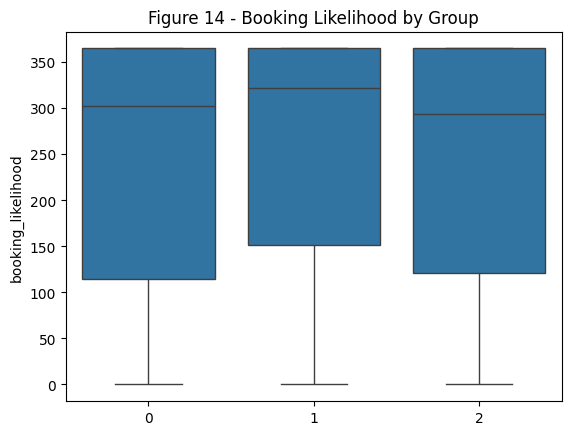

In [ ]:
# Further visualizing the data

sns.boxplot(x = kmeans.labels_, y = y_train['booking_likelihood']).set_title('Figure 14 - Booking Likelihood by Group')

In [ ]:
# Evaluating the performance of the clustering algorithm

from sklearn.metrics import silhouette_score

silhouette_score(x_train_norm, kmeans.labels_, metric='euclidean')

0.5639260093491838

In [ ]:
# Choosing the best number of clusters, as 3 might not be optimal!

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(x_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(x_train_norm, model.labels_, metric='euclidean'))

Text(0.5, 1.0, 'Figure 15 - Finding Optimal K Value')

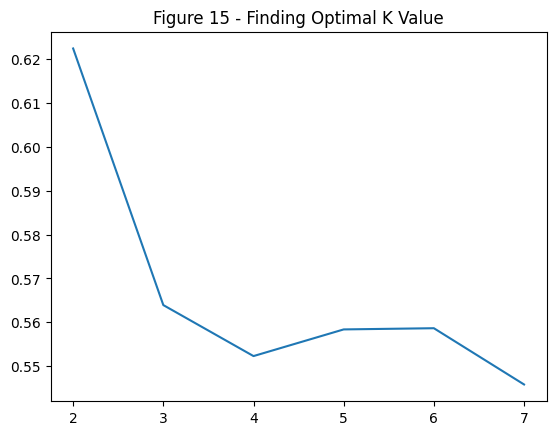

In [ ]:
# Testing which value of k is best

sns.lineplot(x = K, y = score).set_title('Figure 15 - Finding Optimal K Value')

k = 4 is probably the best we can do without overfitting.

Text(0.5, 1.0, 'Figure 16 - Updated Booking Likelihood Groups Across New York City')

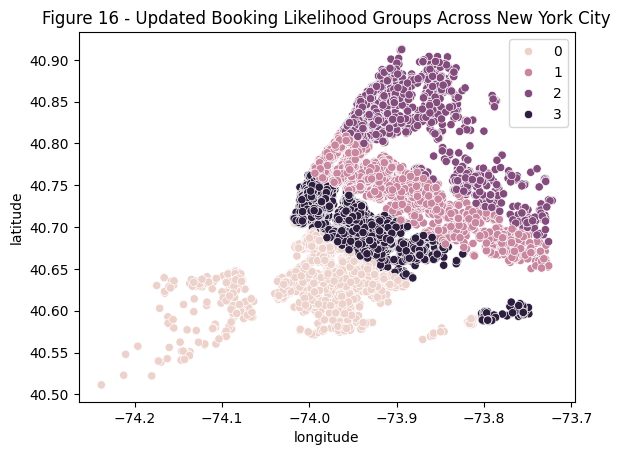

In [ ]:
# Visualizing k = 4

sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_).set_title('Figure 16 - Updated Booking Likelihood Groups Across New York City')

Text(0.5, 1.0, 'Figure 17 - Updated Booking Likelihood by Group')

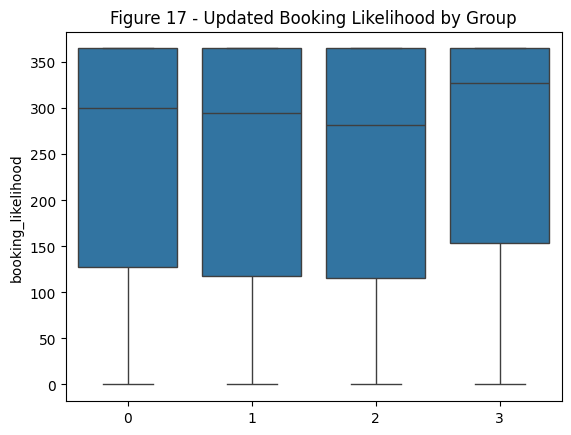

In [ ]:
# Boxplot for k = 4

sns.boxplot(x = fits[2].labels_, y = y_train['booking_likelihood']).set_title('Figure 17 - Updated Booking Likelihood by Group')

(array([3.1907e+04, 5.6540e+03, 7.6400e+02, 2.4600e+02, 1.1300e+02,
        5.1000e+01, 1.4000e+01, 1.6000e+01, 3.0000e+00, 3.0000e+00,
        1.5000e+01, 4.0000e+00, 7.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.

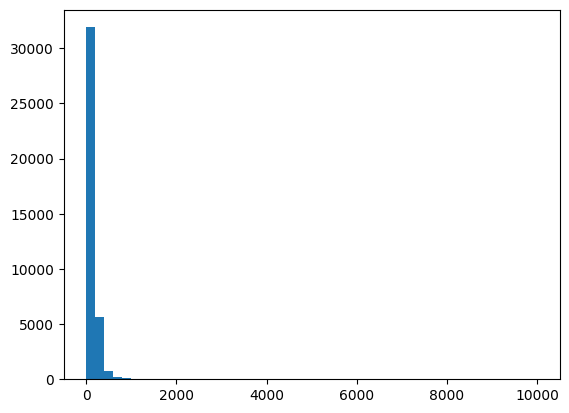

In [ ]:
#histogram of price to show non-normal distribution of data
plt.hist(df.price, bins=50)

In [ ]:
# Drop unnecessary columns
df.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

# Removing outliers in price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Upper and lower bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Convert 'last_review' to numeric
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce').dt.year.fillna(0).astype(int)

df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,booking_likelihood,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,2018,0.21,6,365,0,...,False,False,False,False,False,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,2019,0.38,2,355,10,...,False,False,False,False,False,False,False,False,False,False
3,40.68514,-73.95976,89,1,270,2019,4.64,1,194,171,...,False,False,False,False,False,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,2018,0.10,1,0,365,...,False,False,False,False,False,False,False,False,False,False
5,40.74767,-73.97500,200,3,74,2019,0.59,1,129,236,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('booking_likelihood', axis=1)
y = df['booking_likelihood']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 249    0    0 ...    0    0    0]
 [  15   46    1 ...    0    0    6]
 [   7    1    4 ...    0    0    2]
 ...
 [   0    0    0 ...   43    3   13]
 [   0    0    0 ...    0   95   15]
 [   0    0    0 ...    0    0 4091]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       249
           1       0.52      0.52      0.52        88
           2       0.11      0.10      0.10        41
           3       0.11      0.11      0.11        28
           4       0.18      0.09      0.12        32
           5       0.09      0.07      0.08        29
           6       0.15      0.11      0.13        35
           7       0.06      0.04      0.05        45
           8       0.00      0.00      0.00        20
           9       0.19      0.15      0.17        20
          10       0.04      0.04      0.04        23
          11       0.08      0.11      0.09        19
          12       0.06    